In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shutil 
import os
import sys
import imageio 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
import scipy.ndimage as ndi 
from PIL import Image, ImageOps

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coronahack-chest-xraydataset/Chest_xray_Corona_dataset_Summary.csv
/kaggle/input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person489_bacteria_2067.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0244-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1717_bacteria_4536.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1338_virus_2308.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0166-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person257_bacteria_1194.jpeg
/kaggle/input/coronahack-chest-xraydatas

/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1156_bacteria_3101.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person487_bacteria_2055.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person431_bacteria_1872.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0429-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1730_bacteria_4559.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1115_virus_1840.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1096_virus_1816.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coro

/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0238-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person359_bacteria_1642.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-0853-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-0592-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person398_bacteria_1799.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1168_virus_1966.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1302_bacteria_3266.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahac

/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/kjr-21-e24-g002-l-b.jpg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person778_virus_1408.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person809_bacteria_2717.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person458_bacteria_1952.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person669_virus_1255.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0185-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person64_bacteria_318.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Ches

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os 

from tensorflow.python import keras 
from keras import backend as K
from keras import layers
from keras.models import Model, Sequential 
from keras.optimizers import Adam 
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.metrics import classification_report, confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix 

In [5]:
print(os.listdir("../input/coronahack-chest-xraydataset/"))
print(os.listdir("../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/"))


['Chest_xray_Corona_dataset_Summary.csv', 'Chest_xray_Corona_Metadata.csv', 'Coronahack-Chest-XRay-Dataset']
['train', 'test']


In [6]:
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.0.2:8470
REPLICAS:  8


In [7]:
os.mkdir("/kaggle/corona_check")
os.mkdir("/kaggle/corona_check/train")
os.mkdir("/kaggle/corona_check/test")
os.mkdir("/kaggle/corona_check/train/Normal/")
os.mkdir("/kaggle/corona_check/train/COVID19/")
os.mkdir("/kaggle/corona_check/test/Normal/")
os.mkdir("/kaggle/corona_check/test/COVID19/")

In [8]:
print(os.listdir("/kaggle/corona_check/train/Normal"))
print(os.listdir("/kaggle/corona_check/test/Normal"))

[]
[]


In [9]:
!cd /kaggle/corona_check/train/
!rm /kaggle/corona_check/train/*.jpeg

!cd /kaggle/corona_check/test/
!rm /kaggle/corona_check/test/*.jpeg

rm: cannot remove '/kaggle/corona_check/train/*.jpeg': No such file or directory
rm: cannot remove '/kaggle/corona_check/test/*.jpeg': No such file or directory


In [10]:
def copy_img(src_path,dst_path):
    try:
        shutil.copy(src_path, dst_path)
        stmt ='File Copied'
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
        stmt ='Copy Failed - IO Error'
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))
        stmt ='Copy Failed - other Error'+ sys.exc_info()
        
    return stmt 

In [11]:
data_dir="../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/"
metadata_path="../input/coronahack-chest-xraydataset/"

In [12]:
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [13]:
meta_data = pd.read_csv(metadata_path+'Chest_xray_Corona_Metadata.csv')
meta_data.head()


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [14]:
meta_data['File_path']=''
meta_data.loc[meta_data['Dataset_type']=='TRAIN','File_path']=train_dir+'/'
meta_data.loc[meta_data['Dataset_type']=='TEST','File_path']=test_dir+'/'

In [16]:
meta_data['X_ray_img_nm_path']=meta_data['File_path']+meta_data['X_ray_image_name']

In [17]:
meta_data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,File_path,X_ray_img_nm_path
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...


In [19]:
meta_COVID_19_train = meta_data[(meta_data['Dataset_type']=='TRAIN') & 
                        ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') & (meta_data['Label_2_Virus_category']=='COVID-19'))]


meta_COVID_19_test = meta_data[(meta_data['Dataset_type']=='TEST') & 
                        ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') & (meta_data['Label_2_Virus_category']=='COVID-19'))]


## Moving the 10 Corona Infected dataset to Test

meta_data_covid_test = meta_data[meta_data['Label_2_Virus_category']=='COVID-19'].sample(12)
meta_COVID_19_train = meta_COVID_19_train[~meta_COVID_19_train['X_ray_image_name'].isin(meta_data_covid_test['X_ray_image_name'])]
meta_COVID_19_test_fnl = pd.concat([meta_data_covid_test,meta_COVID_19_test],ignore_index=False)

In [20]:
meta_COVID_19_train.loc[meta_COVID_19_train['Label'] =='Pnemonia','Label']='COVID19'
meta_COVID_19_test_fnl.loc[meta_COVID_19_test_fnl['Label'] =='Pnemonia','Label']='COVID19'

In [21]:
print("===============Train Set==========================\n")
print(meta_COVID_19_train.groupby(['Label']).agg({'Dataset_type':'count'}))

print("\n===============Test Set==========================\n")
print(meta_COVID_19_test_fnl.groupby(['Label']).agg({'Dataset_type':'count'}))

===============Train Set==========================

         Dataset_type
Label                
COVID19            46
Normal           1342

===============Test Set==========================

         Dataset_type
Label                
COVID19            12
Normal            234


In [22]:
meta_COVID_19_train['Img_tgt_path']="/kaggle/corona_check/train/"
meta_COVID_19_test_fnl['Img_tgt_path']="/kaggle/corona_check/test/"

In [24]:
meta_COVID_19_train.loc[meta_COVID_19_train['Label']=='Normal','Img_tgt_path']=meta_COVID_19_train['Img_tgt_path']+'Normal/'
meta_COVID_19_train.loc[meta_COVID_19_train['Label']=='COVID19','Img_tgt_path']=meta_COVID_19_train['Img_tgt_path']+'COVID19/'

meta_COVID_19_test_fnl.loc[meta_COVID_19_test_fnl['Label']=='Normal','Img_tgt_path']=meta_COVID_19_test_fnl['Img_tgt_path']+'Normal/'
meta_COVID_19_test_fnl.loc[meta_COVID_19_test_fnl['Label']=='COVID19','Img_tgt_path']=meta_COVID_19_test_fnl['Img_tgt_path']+'COVID19/'

In [25]:
meta_COVID_19_train['Move_status'] = np.vectorize(copy_img)(meta_COVID_19_train['X_ray_img_nm_path'],meta_COVID_19_train['Img_tgt_path'])
meta_COVID_19_test_fnl['Move_status'] = np.vectorize(copy_img)(meta_COVID_19_test_fnl['X_ray_img_nm_path'],meta_COVID_19_test_fnl['Img_tgt_path'])

In [26]:
dirname = '/kaggle/corona_check/'
train_path = os.path.join(dirname, 'train/')
train_nrml_pth = os.path.join(train_path, 'Normal/')
train_covid19_pth = os.path.join(train_path, 'COVID19/')

test_path = os.path.join(dirname, 'test/')
test_nrml_pth = os.path.join(train_path, 'Normal/')
test_covid19_pth = os.path.join(train_path, 'COVID19/')

In [27]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.imshow(img)

    plt.tight_layout()

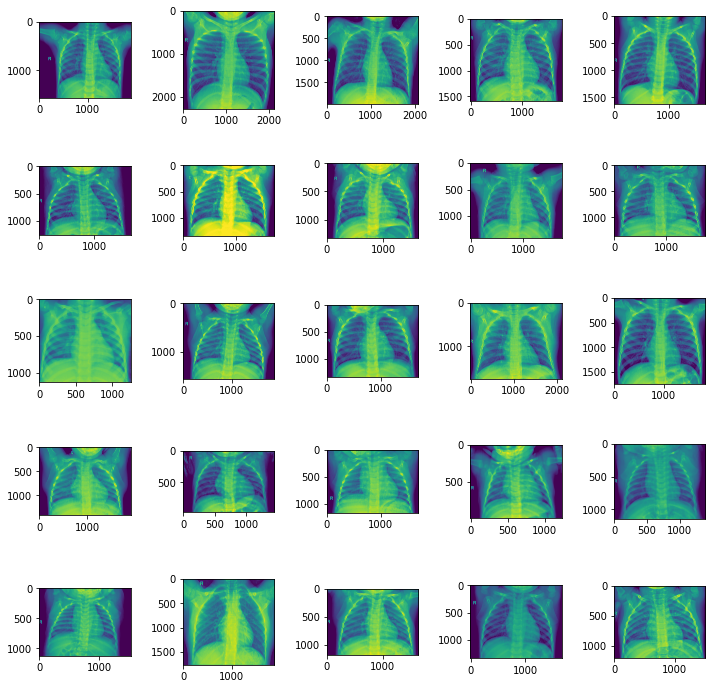

In [28]:
plot_imgs(train_nrml_pth)


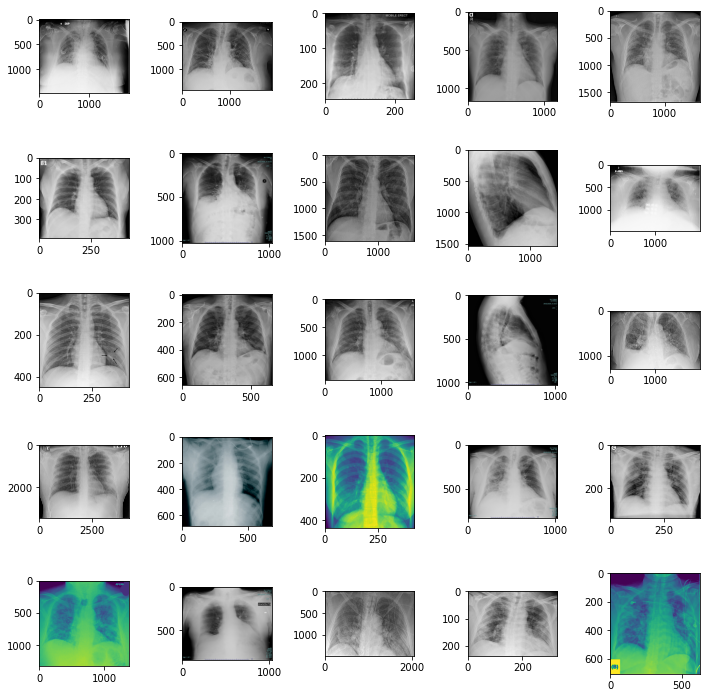

In [29]:
plot_imgs(train_covid19_pth)

In [33]:
def plot_img_hist(item_dir, num_img=6):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]
  
  #plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    fig1 = plt.figure(idx,figsize=(10, 10))
    fig1.add_subplot(2, 2, 1)
    img = mplimg.imread(img_path, )
    plt.imshow(img)
    fig1.add_subplot(2, 2, 2)
    plt.hist(img.ravel(),bins=256, fc='k', ec='k')
  
  plt.tight_layout()

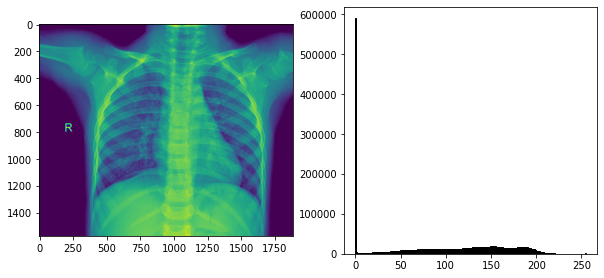

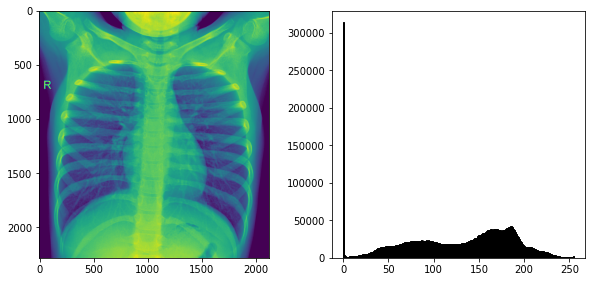

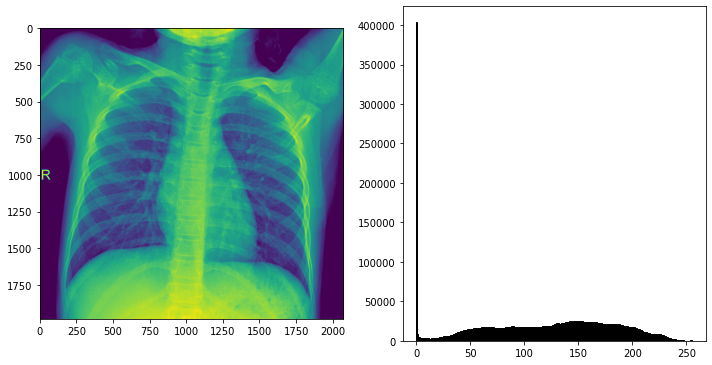

In [34]:
plot_img_hist(train_nrml_pth,3)


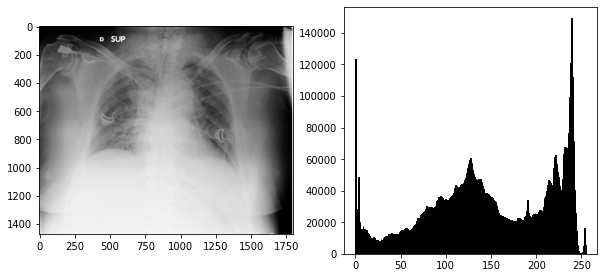

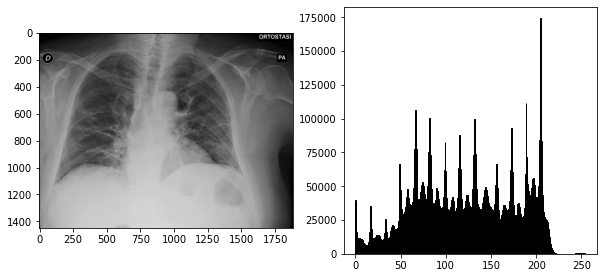

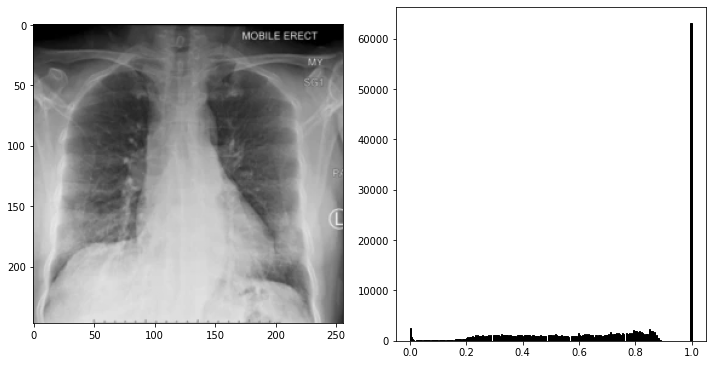

In [35]:
plot_img_hist(train_covid19_pth,3)

In [38]:
def plot_img_hist_ndi(item_dir, num_img=6):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]
  
  #plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    im = imageio.imread(img_path)
    hist = ndi.histogram(im, min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    
    fig1 = plt.figure(idx,figsize=(10, 10))
    fig1.add_subplot(2, 3, 1)
    img = mplimg.imread(img_path, )
    plt.title("No. {}".format(idx))
    plt.imshow(img)
    fig1.add_subplot(2, 3, 2)
    plt.title("Histogram")
    plt.plot(hist)
    fig1.add_subplot(2, 3, 3)
    plt.title("CDF")
    plt.plot(cdf)

  plt.tight_layout()

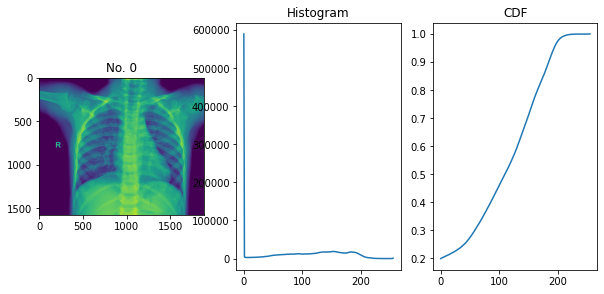

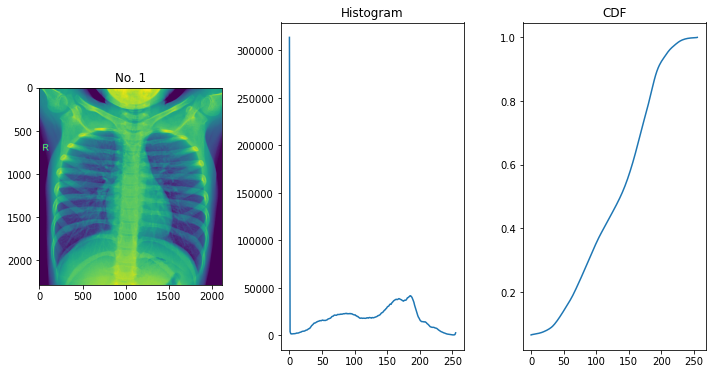

In [39]:
plot_img_hist_ndi(train_nrml_pth,2)

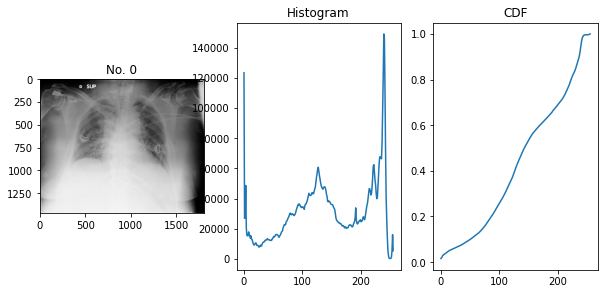

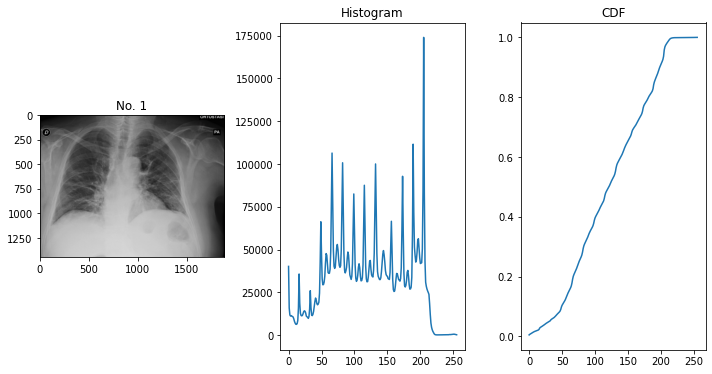

In [40]:
plot_img_hist_ndi(train_covid19_pth,2)

In [41]:
train_dir = r'/kaggle/corona_check/train/'
test_dir = r'/kaggle/corona_check/test/'

## Model Params

image_size = 150
batch_size = 50
nb_classes = 2

train_datagen = ImageDataGenerator(rescale = 1./255,     # Convert all pixels to 0-1
                              width_shift_range = 0.1,   # The magnitude of the horizontal shift of the picture when the data is improved
                              height_shift_range = 0.1,  # The magnitude of the vertical shift of the picture when the data is boosted
                              shear_range = 0.2,         # Set the shear strength
                              horizontal_flip = True,    # Randomly select half of the picture to flip horizontally
                              fill_mode ='nearest')      #The points that exceed the boundary will be processed according to the method given by this parameter.Generally, there are some  
                                                         # ‘constant’，‘nearest’，‘reflect’或‘wrap。

test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
print(test_dir)

/kaggle/corona_check/test/


In [43]:
print("Training set: ")

# Generate batches of tensor image data through real-time data augmentation.

train_datagen = train_datagen.flow_from_directory(train_dir,(image_size, image_size), batch_size=batch_size, class_mode='categorical')  
print("Testing set: ")

test_datagen = test_datagen.flow_from_directory(test_dir,(image_size,image_size),batch_size=batch_size,class_mode='categorical')
#Define step count
train_steps = train_datagen.samples//batch_size # "//" means integer division
test_steps = test_datagen.samples//batch_size

traning set: 
Found 1388 images belonging to 2 classes.
testing set: 
Found 246 images belonging to 2 classes.


In [44]:
if K.image_data_format()=='channels_first':  
   input_shape =(3,image_size,image_size)
else:
   input_shape =(image_size,image_size,3)   
   
# A ensor of 150x150x3, where 150x150 is used for image pixels and 3 is used for three color channels
img_input = layers.Input(shape=input_shape)


#The first convolution layer extracts the features of 3x3x32 (size of 2D convolution window: 3x3, output 32 dimensions),
#Uses a linear rectification function (Rectified Linear Unit, ReLU), and then the largest pooling layer with a size of 2x2

x = layers.Conv2D(32,3,activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


# Flatten the feature map into a one-dimensional data (`1-dim`) tensor to add a fully connected layer (dense)

x = layers.Flatten()(x)


# Use `sigmoid` activation function and 128 neurons to create a fully connected layer

x = layers.Dense(128,activation='sigmoid')(x)

# Randomly disconnect the input neural cloud with a certain probability to prevent overfitting
x = layers.Dropout(0.5)(x)                       


# Create output layer with 2 neurons and `softmax` activation function

output = layers.Dense(2,activation='softmax')(x)

model= Model(img_input,output)

model.summary()  

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0   

In [45]:
#Define: Model Parameters 
#Multi-class logarithmic loss. 
#We generally set the list to metrics = ['accuracy']
model.compile(loss='categorical_crossentropy', 
              optimizer =Adam(lr=0.0001),
              metrics = ['acc'] )              


#Training iterations

epochs = 20


# Training model
history = model.fit_generator(train_datagen,
                             steps_per_epoch=train_steps,
                             epochs=epochs,
                             validation_data=test_datagen,
                             validation_steps=test_steps ) 

Epoch 1/20
27/27 [==============================] - 46s 2s/step - loss: 0.2165 - acc: 0.9395 - val_loss: 0.2706 - val_acc: 0.9450
Epoch 2/20
27/27 [==============================] - 49s 2s/step - loss: 0.1787 - acc: 0.9626 - val_loss: 0.0971 - val_acc: 0.9490
Epoch 3/20
27/27 [==============================] - 45s 2s/step - loss: 0.1398 - acc: 0.9679 - val_loss: 0.1972 - val_acc: 0.9490
Epoch 4/20
27/27 [==============================] - 45s 2s/step - loss: 0.1269 - acc: 0.9686 - val_loss: 0.0661 - val_acc: 0.9694
Epoch 5/20
27/27 [==============================] - 44s 2s/step - loss: 0.1158 - acc: 0.9649 - val_loss: 0.1653 - val_acc: 0.9439
Epoch 6/20
27/27 [==============================] - 45s 2s/step - loss: 0.0859 - acc: 0.9701 - val_loss: 0.1204 - val_acc: 0.9550
Epoch 7/20
27/27 [==============================] - 48s 2s/step - loss: 0.0627 - acc: 0.9723 - val_loss: 0.0556 - val_acc: 0.9796
Epoch 8/20
27/27 [==============================] - 45s 2s/step - loss: 0.0527 - acc: 0.97

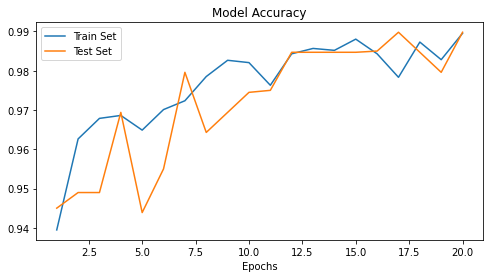

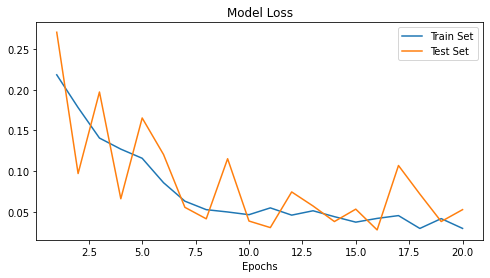

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(8,4))
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.show()

In [47]:
# In this cell, we are evaluating the accuray, precision, and recall of the model. 

Y_pred = model.predict_generator(test_datagen,test_steps+1)
y_pred = np.argmax(Y_pred,axis=1)

CM =confusion_matrix(test_datagen.classes,y_pred)
print("Confusion Matrix :")
print(CM)

pneumonia_precision= CM[1][1] / (CM[1][0]+CM[1][1])
print("pnuemonia_precision:", pneumonia_precision)

pnuemonia_recall = CM[1][1] / (CM[1][1]+CM[0][1])
print('pnuemonia_recall   :', pnuemonia_recall)

accuracy = (CM[0][0]+CM[1][1])/(CM[0][0]+CM[0][1]+CM[1][0]+CM[1][1])
print('Accuracy           :', accuracy)

target_names = ['Normal', 'COVID19'] 
print(classification_report(test_datagen.classes, y_pred, target_names=target_names))

Confusion Matrix :
[[  1  11]
 [ 11 223]]
pnuemonia_precision: 0.9529914529914529
pnuemonia_recall   : 0.9529914529914529
Accuracy           : 0.9105691056910569
              precision    recall  f1-score   support

      Normal       0.08      0.08      0.08        12
     COVID19       0.95      0.95      0.95       234

    accuracy                           0.91       246
   macro avg       0.52      0.52      0.52       246
weighted avg       0.91      0.91      0.91       246

